<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3


## Notebooks

There is a total of 2 notebooks.
- Notebook 1 (Subreddit API) 
- **Notebook 2 (EDA and Modelling)**
 

**This is Notebook 2 (EDA & Modelling)**


## Table of Content
- [Problem Statement](#Problem-Statement)
- [Data Cleaning and EDA](#Data-Cleaning-and-EDA)
- [Modelling](#Modelling)
- [Conclusion and Recommendation](#Conclusion-and-Recommendation)
- [Limitations and next step](#Limitations-and-next-step)

## Problem Statement

We are a team of data scientist that are currently employed by Twitch. As twitch has been successful in their streaming business, recently twitch plans to create a forum community and has created a beta forum where they engaged a small group of players to test the effectiveness of the forum by creating content and comments to attract users. Due to the overwhelming response, the beta forum is currently filled with comments ranging from Dota2, League of legends to other games such as Valorant. Players who are only interested in Dota 2 have to scroll through a bunch of comments that were not related and thus raised a feedback to Twitch. The company has engaged our team to create a machine learning model to learn and categorized the data into sub forum to ensure users who are only interested in dota 2 can read and comment only in dota 2 forums without all the noise. My team and i will be constructing two categorical model which is mainly the Multinominal Naive Bayes and Logistic regression models. The success of this project would be to ensure the best model is able to at least be able to obtain more than 85% accuracy. 

Our audience would be software engineers, sales and marketing peers who will be working with us hand in hand to improve the forum and build on the improving the functionality as well as interesting added features that will be included at the end of the report. 

## Dataset Selected

* [`dota_df.csv`](dota_df.csv): Dota data scraped from Subreddit
* [`lol_df.csv`](lol_df.csv): League of Legends data scraped from Subreddit

The dataset contains titles and comments that were posted by users which could provide useful insight in helping us to build a strong and reliable machine learning model with impactful features. 

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
import nltk

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, roc_auc_score, plot_roc_curve, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400



In [2]:
#Opening and assigning the data to specific variables
dota = pd.read_csv('dota_df.csv')
lol= pd.read_csv('lol_df.csv')

In [3]:
dota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3997 entries, 0 to 3996
Data columns (total 88 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     3997 non-null   int64  
 1   all_awardings                  3997 non-null   object 
 2   allow_live_comments            3997 non-null   bool   
 3   author                         3997 non-null   object 
 4   author_flair_css_class         1448 non-null   object 
 5   author_flair_richtext          3983 non-null   object 
 6   author_flair_template_id       1330 non-null   object 
 7   author_flair_text              1406 non-null   object 
 8   author_flair_text_color        1463 non-null   object 
 9   author_flair_type              3983 non-null   object 
 10  author_fullname                3983 non-null   object 
 11  author_is_blocked              3997 non-null   bool   
 12  author_patreon_flair           3983 non-null   o

In [4]:
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     3999 non-null   int64  
 1   all_awardings                  3999 non-null   object 
 2   allow_live_comments            3999 non-null   bool   
 3   author                         3999 non-null   object 
 4   author_flair_css_class         178 non-null    object 
 5   author_flair_richtext          3966 non-null   object 
 6   author_flair_template_id       764 non-null    object 
 7   author_flair_text              787 non-null    object 
 8   author_flair_text_color        971 non-null    object 
 9   author_flair_type              3966 non-null   object 
 10  author_fullname                3966 non-null   object 
 11  author_is_blocked              3999 non-null   bool   
 12  author_patreon_flair           3966 non-null   o

In [5]:
print(dota.shape)
dota.head()

(3997, 88)


,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,suggested_sort,author_cakeday,gallery_data,is_gallery,crosspost_parent,crosspost_parent_list,poll_data,call_to_action,category,banned_by
0,0,[],False,VRCbot,rattletrap,"[{'a': ':clockwerk:', 'e': 'emoji', 'u': 'https://emoji.redditmedia.com/abat3x0oh0031_t5_2s580/clockwerk'}, {'e': 'text', 't': ' '}, {'a': ':courier-dire:', 'e': 'emoji', 'u': 'https://emoji.redditmedia.com/3laqhswd4t031_t5_2s580/courier-dire'}, {'e': 'text', 't': ' message /u/VRCkid regarding issues'}]",5b871be0-fa8f-11e0-9439-12313b0888e1,:clockwerk: :courier-dire: message /u/VRCkid regarding issues,dark,richtext,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,Twiytwoo,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,Ok_Salamander_5050,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,Ticem4n,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,Remarkable_Ad_3558,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(lol.shape)
lol.head()

(3999, 82)


,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,url_overridden_by_dest,author_flair_background_color,poll_data,crosspost_parent,crosspost_parent_list,banned_by,author_cakeday,distinguished,link_flair_css_class,suggested_sort
0,0,[],False,00Dandy,NaN,"[{'a': ':eufcs:', 'e': 'emoji', 'u': 'https://emoji.redditmedia.com/kgzb3zj7qzg21_t5_2rfxx/eufcs'}, {'e': 'text', 't': ' Miracle Run Enjoyer'}]",393826c6-fd7d-11e8-ad1c-0e254f269dea,:eufcs: Miracle Run Enjoyer,dark,richtext,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,VastoLord_A,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,HiImMrPopo,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,BasicLv13,NaN,[],NaN,NaN,NaN,text,...,https://youtu.be/uGWV40HIBnM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,R3TR0-MK14,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Summary**

For the data imported, there were a few findings:
1. Dota file consist of 3997 rows and 88 columns while lol file consist of 3999 rows and 82 columns
    - During the extraction, the columns collected seem to increase slightly and is not fixed (Varies with each page extraction). However i noticed that the increment did not affect the required columns (subreddit, selftext, title) and the non-required columns would eventually be dropped. 
    - To add further, although i requested to retrieve 100 post per page, i realised there were periods where the page may not have 100 post. As such, there may be extraction of rows that are less than 100 per extraction which will ultimately lead to a slight reduced in the total amount of rows collected. Due to the limitation, i've decided to increase the number of comments collected (4k per subreddit) to ensure i have sufficient data for model prediction after rectifying the non-essential text.
    
    
2. Both files contains a mixture of integer, float, boolean and object datatypes 
3. There were weblinks mentioned in the comments and/or title
4. There were foreign gamers who contributed in non-english comments such as Chinese and Russian text
5. There were images (memes) commented in the post which were shown as NaN values. 
6. There were also comments that were removed by the subreddit moderators due to violation of the rules



### Data Cleaning and EDA

In [7]:
#checking for duplicates for Dota
dota.duplicated(subset=['id'], keep ='first').sum()

0

In [8]:
#checking for duplicates for Dota
lol.duplicated(subset=['id'], keep ='first').sum()

0

In [9]:
#Removing post that were flagged out by moderators
def remove_droppedpost(df_post):
    df_post= df_post[df_post['removed_by_category'].isna()]
    return df_post
lol = remove_droppedpost(lol)
dota = remove_droppedpost(dota)

In [10]:
#Selecting specific target columns
dota_data = dota[['subreddit', 'selftext', 'title']]
dota_data.head()

,subreddit,selftext,title
0,DotA2,\n## **[Ghost Scepter](http://www.dota2wiki.com/wiki/Ghost_Scepter)**\n\n**Ask/Answer/Comment anything related to Ghost Scepter!**\n\nLeave comments under these top level comments for more specific discussion about the item.\n\n{comments},"Item Discussion of the Week: Ghost Scepter (May 26, 2022)"
1,DotA2,can we fix this pls?,Morphling's Talents
2,DotA2,"Now that dragon's blood s3 date is revealed, we can expect an official post from dota regarding this. So if we just spam 'release bp' posts, we might actually get some update. So lets do our part, bois and gals. Copium",Release the kraken
3,DotA2,"Curious, it wasn't for silver edge so we just went from stomping the game to losing to 50 gold items for the next 20. Also 1 of the people doing the shadow blade was an armlet Dagon terrorblade.",If you first phase bounty hunter and 3 of your teammates buy shadowblade. Is it griefing if you do too since we don't care about sentry countering the team?
4,DotA2,NaN,TEAM SPIRIT VLOG. Any thoughts in this guy’s comment? Seems invalidating the entire event just to give their bottom place team a reason.


In [11]:
lol_data = lol[['subreddit', 'selftext', 'title']]
lol_data.head()

,subreddit,selftext,title
0,leagueoflegends,The MSI 2022 rumble stage had 1.184.574 peak viewers and 597.734 average viewers. The number of average viewers is 2% lower compared to MSI 2021 rumble stage. Chinese streaming websites aren't included in these numbers.\n\n&amp;#x200B;\n\nhttps://preview.redd.it/0aalrzvk4u191.png?width=1920&amp;format=png&amp;auto=webp&amp;s=0cd49ad867b0d420ba3ba6d6070e9fd29dfb9e59\n\nHere is the full article:...,1.18 million peak viewers at MSI 2022 rumble stage per escharts.com. 19% higher than MSI 2021 rumble stage
4,leagueoflegends,"Apparently refusing to play with trolls is a problem for riot.\n\nRiot needs to get their act together because they have been pairing me up with bunch of trolls, i was silver 2 on a winning streak and positive win rate and out of nowhere my games are full of trolls, auto fills and jungle troll picks. I haven't got a single good jungle pick in my las 3 games. I've had talon, dravens, nekkos, et...",4hrs of dodge time penalty
7,leagueoflegends,"The main reason why Seraphine apc is doing significantly better is because riot targeted the wrong value for the durability nerfs. They hit her ratios on her W heal and not the base value, meaning she will heal a lot more early on since every champion got more base health and scaling health per level. Hitting the base value on her heal will tone her down to reasonable levels so she doesn't bur...","If riot is going to nerf Seraphine, it should be her heal base values and not her damage."
8,leagueoflegends,"I throw big fat shorkie on him and red smite him , still got pounded into ground\n\nMy items were Liandry + Lichbane + lage rod + Sorc Shoes\n\nHis items Riftmaker , normal boots",Hello I played fizz jungle going 9/3/5 and lost 1v1 to 0/9/1 mordekaiser top with riftmaker and bronze boots AmA
9,leagueoflegends,NaN,"Amazing returns as a player, joins MOUZ."


In [12]:
dota_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3420 entries, 0 to 3996
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  3420 non-null   object
 1   selftext   1847 non-null   object
 2   title      3420 non-null   object
dtypes: object(3)
memory usage: 106.9+ KB


In [13]:
lol_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2445 entries, 0 to 3998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  2445 non-null   object
 1   selftext   1781 non-null   object
 2   title      2445 non-null   object
dtypes: object(3)
memory usage: 76.4+ KB


In [14]:
#Checking for null values
print(dota_data.shape)
dota_data.isnull().sum().sort_values(ascending=False)

(3420, 3)


selftext     1573
subreddit       0
title           0
dtype: int64

In [15]:
#Checking for null values
print(lol_data.shape)
lol_data.isnull().sum().sort_values(ascending=False)

(2445, 3)


selftext     664
subreddit      0
title          0
dtype: int64

In [16]:
#Replace null value with empty space
dota_data = dota_data.fillna('')
dota_data.isnull().sum().sort_values(ascending=False)

subreddit    0
selftext     0
title        0
dtype: int64

In [17]:
#Replace null value with empty space
lol_data = lol_data.fillna('')
lol_data.isnull().sum().sort_values(ascending=False)

subreddit    0
selftext     0
title        0
dtype: int64

In [18]:
#Merging both dataframe together for further processing.
dota_lol_data = pd.concat([dota_data,lol_data],axis=0)
dota_lol_data

,subreddit,selftext,title
0,DotA2,\n## **[Ghost Scepter](http://www.dota2wiki.com/wiki/Ghost_Scepter)**\n\n**Ask/Answer/Comment anything related to Ghost Scepter!**\n\nLeave comments under these top level comments for more specific discussion about the item.\n\n{comments},"Item Discussion of the Week: Ghost Scepter (May 26, 2022)"
1,DotA2,can we fix this pls?,Morphling's Talents
2,DotA2,"Now that dragon's blood s3 date is revealed, we can expect an official post from dota regarding this. So if we just spam 'release bp' posts, we might actually get some update. So lets do our part, bois and gals. Copium",Release the kraken
3,DotA2,"Curious, it wasn't for silver edge so we just went from stomping the game to losing to 50 gold items for the next 20. Also 1 of the people doing the shadow blade was an armlet Dagon terrorblade.",If you first phase bounty hunter and 3 of your teammates buy shadowblade. Is it griefing if you do too since we don't care about sentry countering the team?
4,DotA2,,TEAM SPIRIT VLOG. Any thoughts in this guy’s comment? Seems invalidating the entire event just to give their bottom place team a reason.
...,...,...,...
3994,leagueoflegends,"It's crazy how often, when playing my very scuffed Ornn, or watching actually good players play the game\n\nSunfire alone deals upwards of 10k damage\n\nGetting 10k damage on Items like BOTRK or Tri-Force is almost unthinkable lol and extremely rare, and they're literally built for that\n\nIt's honestly super funny, how :\n\nGore and Sunderer make you thankier than any Tank item, due to Drain ...","But Seriously, why does Sunfire Aegis, deal the same or sometimes even more damage, than dadicated Fighter items"
3995,leagueoflegends,"degradation of the CIS (LCL) region \n Years have passed, the second decade, and the LCL region, like the community, is only getting worse, everyone knows that. there was no development in it and most likely never will be, don’t you think that such a country as Russia does not deserve to be the main representative of the region with the main office in it, for the development of the CIS (LCL)...",perpetual degradation of the CIS (LCL) region
3996,leagueoflegends,"So I challenged myself after seeing a Twitter post from FionnonFire where he posted a picture of a champion and asked his community to comment which pro player they think of when they see that specific champion. While doing one champion a day seemed fine, I felt the need to challenge myself on all champions, so I spent my break at work as well as some off time at home thinking about each champ...",Which pro player do you think of when you see or hear each champion name?
3997,leagueoflegends,"Because MMR Abuse is starting to become a rampant problem for the higher portion of the Ranked ladder, and because there are no rules against it and it goes entirely unpunished; I would like to share with you how YOU can manipulate the MMR system to gain a rank far beyond where you are currently. \n\n\nAgain you are not breaking any rules here, so no need to worry about any punishment. This c...",How to Abuse the MMR System without breaking any rules (Because Riot wont Fix it)


In [19]:
#Merging selftext column with title 
dota_lol_data['merged_body'] = dota_lol_data['selftext'] + '' + dota_lol_data['title'] 
dota_lol_data.drop(['selftext', 'title'],axis =1, inplace = True)
dota_lol_data.head()


,subreddit,merged_body
0,DotA2,"\n## **[Ghost Scepter](http://www.dota2wiki.com/wiki/Ghost_Scepter)**\n\n**Ask/Answer/Comment anything related to Ghost Scepter!**\n\nLeave comments under these top level comments for more specific discussion about the item.\n\n{comments}Item Discussion of the Week: Ghost Scepter (May 26, 2022)"
1,DotA2,can we fix this pls?Morphling's Talents
2,DotA2,"Now that dragon's blood s3 date is revealed, we can expect an official post from dota regarding this. So if we just spam 'release bp' posts, we might actually get some update. So lets do our part, bois and gals. CopiumRelease the kraken"
3,DotA2,"Curious, it wasn't for silver edge so we just went from stomping the game to losing to 50 gold items for the next 20. Also 1 of the people doing the shadow blade was an armlet Dagon terrorblade.If you first phase bounty hunter and 3 of your teammates buy shadowblade. Is it griefing if you do too since we don't care about sentry countering the team?"
4,DotA2,TEAM SPIRIT VLOG. Any thoughts in this guy’s comment? Seems invalidating the entire event just to give their bottom place team a reason.


### Removing Non-essential text

In [20]:
#Removing Website Links
dota_lol_data['merged_body'] = dota_lol_data['merged_body'].apply(lambda x: re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', x))
dota_lol_data['merged_body'].head()


0                                                                                                          \n## **[Ghost Scepter](\n\n**Ask/Answer/Comment anything related to Ghost Scepter!**\n\nLeave comments under these top level comments for more specific discussion about the item.\n\n{comments}Item Discussion of the Week: Ghost Scepter (May 26, 2022)
1                                                                                                                                                                                                                                                                                                                            can we fix this pls?Morphling's Talents
2                                                                                                                       Now that dragon's blood s3 date is revealed, we can expect an official post from dota regarding this. So if we just spam 'release bp' posts, we might actually get som

In [21]:
#Removing Non-english text 
dota_lol_data['merged_body'] = dota_lol_data['merged_body'].apply(lambda x: re.sub('[^a-zA-Z]'," ",x).lower())
dota_lol_data.head()

,subreddit,merged_body
0,DotA2,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may
1,DotA2,can we fix this pls morphling s talents
2,DotA2,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken
3,DotA2,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team
4,DotA2,team spirit vlog any thoughts in this guy s comment seems invalidating the entire event just to give their bottom place team a reason


### Removing Punctuation

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
#Removing punctuation and creating a new clean body text column
def remove_punct(text):
    # store character only if it is not a punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

dota_lol_data['body_text_clean'] = dota_lol_data['merged_body'].apply(lambda x: remove_punct(x))

dota_lol_data.head()



,subreddit,merged_body,body_text_clean
0,DotA2,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may
1,DotA2,can we fix this pls morphling s talents,can we fix this pls morphling s talents
2,DotA2,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken
3,DotA2,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team
4,DotA2,team spirit vlog any thoughts in this guy s comment seems invalidating the entire event just to give their bottom place team a reason,team spirit vlog any thoughts in this guy s comment seems invalidating the entire event just to give their bottom place team a reason


**Managing Data**

Key findings and steps taken:
1. There were no duplicated data during scrapping, thus no action required
2. There were quite a number of post that were flagged and removed by reddit moderators. Thus the rows were removed as it does not value add to our analysis
3. Replaced NaN value with whitespaces
4. Removed non-essential text such as website links, non-english comments, numbers and punctuations.




## Tokenization


In [24]:
def tokenize(text):
    # Matches any character that is neither alphanumeric nor underscore
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text)
    return tokens

dota_lol_data['body_text_tokenized'] = dota_lol_data['body_text_clean'].apply(lambda x: tokenize(x.lower()))

dota_lol_data.head()


,subreddit,merged_body,body_text_clean,body_text_tokenized
0,DotA2,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may,"[, ghost, scepter, ask, answer, comment, anything, related, to, ghost, scepter, leave, comments, under, these, top, level, comments, for, more, specific, discussion, about, the, item, comments, item, discussion, of, the, week, ghost, scepter, may, ]"
1,DotA2,can we fix this pls morphling s talents,can we fix this pls morphling s talents,"[can, we, fix, this, pls, morphling, s, talents]"
2,DotA2,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken,"[now, that, dragon, s, blood, s, date, is, revealed, we, can, expect, an, official, post, from, dota, regarding, this, so, if, we, just, spam, release, bp, posts, we, might, actually, get, some, update, so, lets, do, our, part, bois, and, gals, copiumrelease, the, kraken]"
3,DotA2,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team,"[curious, it, wasn, t, for, silver, edge, so, we, just, went, from, stomping, the, game, to, losing, to, gold, items, for, the, next, also, of, the, people, doing, the, shadow, blade, was, an, armlet, dagon, terrorblade, if, you, first, phase, bounty, hunter, and, of, your, teammates, buy, shadowblade, is, it, griefing, if, you, do, too, since, we, don, t, care, about, sentry, countering, the,..."
4,DotA2,team spirit vlog any thoughts in this guy s comment seems invalidating the entire event just to give their bottom place team a reason,team spirit vlog any thoughts in this guy s comment seems invalidating the entire event just to give their bottom place team a reason,"[team, spirit, vlog, any, thoughts, in, this, guy, s, comment, seems, invalidating, the, entire, event, just, to, give, their, bottom, place, team, a, reason, ]"


In [25]:
#Checking for outliers in the tokenized words
dota_lol_data['token_len'] = dota_lol_data.loc[:,'body_text_tokenized'].apply(lambda x: len(set(x)))
dota_lol_data.head()
dota_lol_data.head()

,subreddit,merged_body,body_text_clean,body_text_tokenized,token_len
0,DotA2,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may,"[, ghost, scepter, ask, answer, comment, anything, related, to, ghost, scepter, leave, comments, under, these, top, level, comments, for, more, specific, discussion, about, the, item, comments, item, discussion, of, the, week, ghost, scepter, may, ]",25
1,DotA2,can we fix this pls morphling s talents,can we fix this pls morphling s talents,"[can, we, fix, this, pls, morphling, s, talents]",8
2,DotA2,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken,"[now, that, dragon, s, blood, s, date, is, revealed, we, can, expect, an, official, post, from, dota, regarding, this, so, if, we, just, spam, release, bp, posts, we, might, actually, get, some, update, so, lets, do, our, part, bois, and, gals, copiumrelease, the, kraken]",40
3,DotA2,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team,"[curious, it, wasn, t, for, silver, edge, so, we, just, went, from, stomping, the, game, to, losing, to, gold, items, for, the, next, also, of, the, people, doing, the, shadow, blade, was, an, armlet, dagon, terrorblade, if, you, first, phase, bounty, hunter, and, of, your, teammates, buy, shadowblade, is, it, griefing, if, you, do, too, since, we, don, t, care, about, sentry, countering, the,...",54
4,DotA2,team spirit vlog any thoughts in this guy s comment seems invalidating the entire event just to give their bottom place team a reason,team spirit vlog any thoughts in this guy s comment seems invalidating the entire event just to give their bottom place team a reason,"[team, spirit, vlog, any, thoughts, in, this, guy, s, comment, seems, invalidating, the, entire, event, just, to, give, their, bottom, place, team, a, reason, ]",24


## Exploring distribution

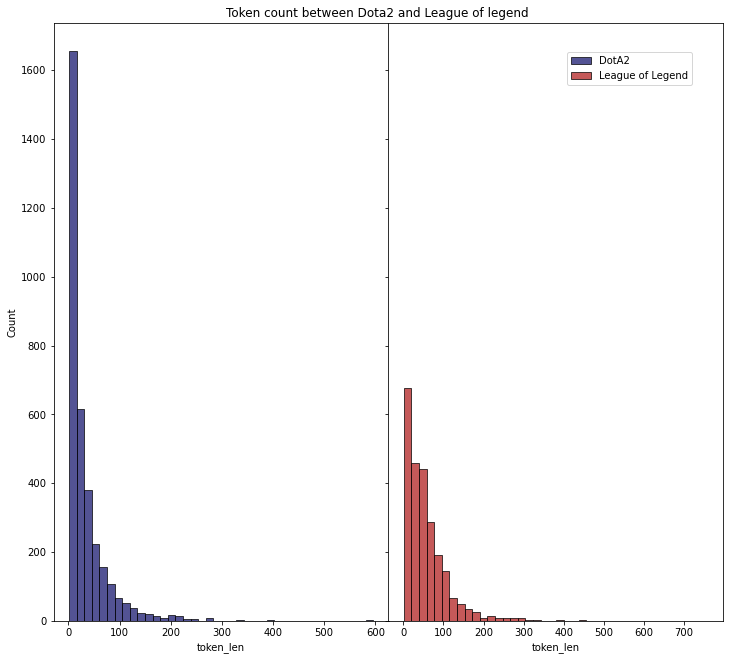

In [26]:
def hist_subplot(dataset1, dataset2, label1='', label2='', title=''):
    fig, ax = plt.subplots(1,2,figsize=(12,11),sharey = True)
    fig.suptitle(title,y=0.9)
    
    
    subplot1 = sns.histplot(dataset1, ax=ax[0], color='midnightblue', bins=40)
    subplot2 = sns.histplot(dataset2, ax=ax[1], color='firebrick', bins=40)
    
    plt.subplots_adjust(wspace=0) # can change to 0
    
    if label1 != '' and label2 != '':
        fig.legend(labels=[label1,label2], bbox_to_anchor=(0.87,0.85))
        
        return subplot1,subplot2

his1,his2 = hist_subplot(dota_lol_data[dota_lol_data['subreddit']=='DotA2']['token_len'],
                        dota_lol_data[dota_lol_data['subreddit']=='leagueoflegends']['token_len'],
                        label1='DotA2', label2='League of Legend', title='Token count between Dota2 and League of legend')
    
    
    

In [27]:
#Content length comparison 
dota_lol_data[dota_lol_data['token_len']>500]['merged_body'].apply(print)


part     part     there is something i haven t told you about john  i m not sure why have i left it out before  this event was the trigger that forced john to change his attitude and how he looks at the game   the events that you are about to read  happened long before john met yatoro   it was a typical day in john s life  the night before when he went to bed  he promised himself that next day he will be productive and that the first the he will do in the morning is to sit down and study for a few hours and clean his room  he promised himself that he won t play dota the next day  it s no surprise that the first thing he actually did in the morning was a nice game of dota  the best thing you can do to wake up and kickstart your day is a game of dota  right  turns out it wasn t   please note that there was no rolequeue when this happened  john started dota  clicked the find match button and the clock started ticking   even before the game started  he knew he was going to play sven  he wa

3247    None
3376    None
920     None
1348    None
2413    None
3978    None
Name: merged_body, dtype: object

In [28]:
#Displaying the content for length of words less than 10 
dota_lol_data[dota_lol_data['token_len']<10]['merged_body'].apply(print)



can we fix this pls morphling s talents
dota  dragon s blood confirmed on netflix  geekedweek
dota  dragon s blood confirmed on netlix  geekedweek
 amp  x   b    grim future of dota
ngx undertaker
dragon s blood s  announcement coming        
ammar the gigachad
 long long while ago
we need these two back to scene
  a small doto meme
the arrows don t miss 
nigma hinting towards sumail
nigma galaxy on twitter teasing wraith king
jukes so good make opponent say damn
obligatory texttrue sight when  
nothing like a day after the other
wraith pact is a balanced item
  so good make ya enemy say damn
we ride  mirana    mirana my second favorite heroe
new gyro persona leaked 
atf s toxicity is basically ceb on steroid
man s got priorities
stockholm souvenir of my first lan event
meepos shard can be useful sometimes 
bounty runes
imagine being toxic on a videogame lmao
i love both colors
 amp  x   b    wanda
when you finally get that comeback gold
  is this attack view option qojqva is using 
an

i ve built a webapp to optimise team challenges
ocean song seraphine   passive music
adc bullying session right before the durability patch
initial d   skarner
the small yet satisfying support things 
swain of legends
battle boss bel veth skin preview
ocean song yone  seraphine  nidalee  zeri  ashe   pbe preview
 the earth calls  and i must answer 
voice   bel veth  the void empress   english
new oceansong skins
quinn is thirsty and lulu obliges the poor fellow
illegal zoe bubble
      patch notes
patch       notes
aatrox   v   smooth final q killer
speedrun maybe  didn t know any of my teamates
aatrox is balanced
bel veth abilities rundown 
ocean song skins   patch       pbe preview
 deleted ocean song skins   patch       pbe preview
bel veth full abilities   infinite attack speed 
bel veth full ability reveal   infinite attack speed
ocean song seraphine  yone  ashe  pool party      
new pool party skins preview
good thing galeforce does magic damage    v  penta 
jankos   the big brot

1       None
6       None
7       None
10      None
14      None
        ... 
3955    None
3967    None
3970    None
3972    None
3974    None
Name: merged_body, Length: 1608, dtype: object

In [29]:
#Dropping token length column after checking outliers
dota_lol_data.drop(['token_len'],axis=1,inplace =True)
dota_lol_data.head()

,subreddit,merged_body,body_text_clean,body_text_tokenized
0,DotA2,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may,"[, ghost, scepter, ask, answer, comment, anything, related, to, ghost, scepter, leave, comments, under, these, top, level, comments, for, more, specific, discussion, about, the, item, comments, item, discussion, of, the, week, ghost, scepter, may, ]"
1,DotA2,can we fix this pls morphling s talents,can we fix this pls morphling s talents,"[can, we, fix, this, pls, morphling, s, talents]"
2,DotA2,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken,"[now, that, dragon, s, blood, s, date, is, revealed, we, can, expect, an, official, post, from, dota, regarding, this, so, if, we, just, spam, release, bp, posts, we, might, actually, get, some, update, so, lets, do, our, part, bois, and, gals, copiumrelease, the, kraken]"
3,DotA2,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team,"[curious, it, wasn, t, for, silver, edge, so, we, just, went, from, stomping, the, game, to, losing, to, gold, items, for, the, next, also, of, the, people, doing, the, shadow, blade, was, an, armlet, dagon, terrorblade, if, you, first, phase, bounty, hunter, and, of, your, teammates, buy, shadowblade, is, it, griefing, if, you, do, too, since, we, don, t, care, about, sentry, countering, the,..."
4,DotA2,team spirit vlog any thoughts in this guy s comment seems invalidating the entire event just to give their bottom place team a reason,team spirit vlog any thoughts in this guy s comment seems invalidating the entire event just to give their bottom place team a reason,"[team, spirit, vlog, any, thoughts, in, this, guy, s, comment, seems, invalidating, the, entire, event, just, to, give, their, bottom, place, team, a, reason, ]"


**Observation**

After tokenizing the text, one observation i've discovered is that majority of text have tokenized word count less than 100 (left skewed as show in the charts). As such, i've decided to look deeper to see and compare the context of large word count vs small word count

#### **Findings**
Most of the short tokenized word count (less than 10) that are short direct chatters with a mixture of brief game specifics that could help us in our classification and prediction process.

While there is a small groups of comments that have tokenized words count of more than 100. The comments in such rows were very detailed with informative game specifics which will also help in aiding our model. As a result, no action was taken to remove the outliers of long posts contributed.



## Remove Stopwords

In [30]:
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['since','gt','even','people','know','dont','match','playing','im','would','one','time','bo',
                  'get','player','team','game','damage','guy','something','every','please','see','much',
                  'good','really',' back','cant','it', 'account','still','want','think','also','support',
                  'make','item','win','first','year','enemy','thing','day','feel','could','top','go','got',
                  'ampx', 'need', 'played', 'if', 'you', 'in', 'the','ti',
                  'way', 'anyone', 'back', 'new', 'players','play', 'like', 'lane', 'group', 'server', 'change',
                  'fix','guide','id','last','patch','bug','lp','video','level','ive','someone','chat','skin','ranked',
                  'games', 'going', 'say', 'getting', 'help', 'mid', 'rank', 'never', 'give', 'best', 
                  'issue', 'client', 'post', 'skins', 'guess', 'update', 'po', 'guys', 'bad', 'stage', 'else',
                  'teams','fun','find','carry','screen','right','doesnt','friend', 'work', 'made', 'main', 'point', 
                  'love', 'reason', 'high', 'many', 'better', 'ever', 'come', 'years', 'today', 'thought', 'next', 'kills', 'sea',
                  'anything','everyone', 'na', 'kill', 'take', 'pro', 'report', 'second', 'idea', 'banned', 'pick', 'end', 'lot', 'well', 
                  'look', 'looking', 'problem', 'didnt', 'start', 'literally', 'eg', 'title', 'maybe', 'month', 'hard', 'use',
                  'question', 'weeks', 'always', 'two', 'around', 'week', 'twitch', 'already', 'bot', 'queue', 'watch', 'trying', 'og',
                  'role', 'clash', 'true', 'ban', 'actually', 'tell', 'show', 'event', 'skill', 'without', 'able', 'let', 'sure',
                  'score', 'pas', 'try', 'ago','min', 'old', 'ward', 'different', 'pretty', 'mean', 'hope', 'pentakill', 'minute', 'season',
                  'reward', 'battle', 'jungle', 'thanks', 'keep','dota','dota2','leagueoflegends','lol', 'league', 'legends', 'amp', 'x200b', ''])



In [31]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

dota_lol_data['body_text_nostop'] = dota_lol_data['body_text_tokenized'].apply(lambda x:remove_stopwords(x))
dota_lol_data.head()

,subreddit,merged_body,body_text_clean,body_text_tokenized,body_text_nostop
0,DotA2,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may,"[, ghost, scepter, ask, answer, comment, anything, related, to, ghost, scepter, leave, comments, under, these, top, level, comments, for, more, specific, discussion, about, the, item, comments, item, discussion, of, the, week, ghost, scepter, may, ]","[ghost, scepter, ask, answer, comment, related, ghost, scepter, leave, comments, comments, specific, discussion, comments, discussion, ghost, scepter, may]"
1,DotA2,can we fix this pls morphling s talents,can we fix this pls morphling s talents,"[can, we, fix, this, pls, morphling, s, talents]","[pls, morphling, talents]"
2,DotA2,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken,"[now, that, dragon, s, blood, s, date, is, revealed, we, can, expect, an, official, post, from, dota, regarding, this, so, if, we, just, spam, release, bp, posts, we, might, actually, get, some, update, so, lets, do, our, part, bois, and, gals, copiumrelease, the, kraken]","[dragon, blood, date, revealed, expect, official, regarding, spam, release, bp, posts, might, lets, part, bois, gals, copiumrelease, kraken]"
3,DotA2,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team,"[curious, it, wasn, t, for, silver, edge, so, we, just, went, from, stomping, the, game, to, losing, to, gold, items, for, the, next, also, of, the, people, doing, the, shadow, blade, was, an, armlet, dagon, terrorblade, if, you, first, phase, bounty, hunter, and, of, your, teammates, buy, shadowblade, is, it, griefing, if, you, do, too, since, we, don, t, care, about, sentry, countering, the,...","[curious, silver, edge, went, stomping, losing, gold, items, shadow, blade, armlet, dagon, terrorblade, phase, bounty, hunter, teammates, buy, shadowblade, griefing, care, sentry, countering]"
4,DotA2,team spirit vlog any thoughts in this guy s comment seems invalidating the entire event just to give their bottom place team a reason,team spirit vlog any thoughts in this guy s comment seems invalidating the entire event just to give their bottom place team a reason,"[team, spirit, vlog, any, thoughts, in, this, guy, s, comment, seems, invalidating, the, entire, event, just, to, give, their, bottom, place, team, a, reason, ]","[spirit, vlog, thoughts, comment, seems, invalidating, entire, bottom, place]"


## Stemming


In [32]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

dota_lol_data['body_text_stemmed'] = dota_lol_data['body_text_nostop'].apply(lambda x: stemming(x))
dota_lol_data.head()



,subreddit,merged_body,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,DotA2,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may,"[, ghost, scepter, ask, answer, comment, anything, related, to, ghost, scepter, leave, comments, under, these, top, level, comments, for, more, specific, discussion, about, the, item, comments, item, discussion, of, the, week, ghost, scepter, may, ]","[ghost, scepter, ask, answer, comment, related, ghost, scepter, leave, comments, comments, specific, discussion, comments, discussion, ghost, scepter, may]","[ghost, scepter, ask, answer, comment, relat, ghost, scepter, leav, comment, comment, specif, discuss, comment, discuss, ghost, scepter, may]"
1,DotA2,can we fix this pls morphling s talents,can we fix this pls morphling s talents,"[can, we, fix, this, pls, morphling, s, talents]","[pls, morphling, talents]","[pl, morphl, talent]"
2,DotA2,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken,"[now, that, dragon, s, blood, s, date, is, revealed, we, can, expect, an, official, post, from, dota, regarding, this, so, if, we, just, spam, release, bp, posts, we, might, actually, get, some, update, so, lets, do, our, part, bois, and, gals, copiumrelease, the, kraken]","[dragon, blood, date, revealed, expect, official, regarding, spam, release, bp, posts, might, lets, part, bois, gals, copiumrelease, kraken]","[dragon, blood, date, reveal, expect, offici, regard, spam, releas, bp, post, might, let, part, boi, gal, copiumreleas, kraken]"
3,DotA2,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team,"[curious, it, wasn, t, for, silver, edge, so, we, just, went, from, stomping, the, game, to, losing, to, gold, items, for, the, next, also, of, the, people, doing, the, shadow, blade, was, an, armlet, dagon, terrorblade, if, you, first, phase, bounty, hunter, and, of, your, teammates, buy, shadowblade, is, it, griefing, if, you, do, too, since, we, don, t, care, about, sentry, countering, the,...","[curious, silver, edge, went, stomping, losing, gold, items, shadow, blade, armlet, dagon, terrorblade, phase, bounty, hunter, teammates, buy, shadowblade, griefing, care, sentry, countering]","[curiou, silver, edg, went, stomp, lose, gold, item, shadow, blade, armlet, dagon, terrorblad, phase, bounti, hunter, teammat, buy, shadowblad, grief, care, sentri, counter]"
4,DotA2,team spirit vlog any thoughts in this guy s comment seems invalidating the entire event just to give their bottom place team a reason,team spirit vlog any thoughts in this guy s comment seems invalidating the entire event just to give their bottom place te

## Lemmatize

In [33]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    # return list of all lemmatized words for their corresponding words in tokenized_text
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

dota_lol_data['body_text_lemmatized'] = dota_lol_data['body_text_nostop'].apply(lambda x: lemmatizing(x))
dota_lol_data.head(10)


,subreddit,merged_body,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,DotA2,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may,"[, ghost, scepter, ask, answer, comment, anything, related, to, ghost, scepter, leave, comments, under, these, top, level, comments, for, more, specific, discussion, about, the, item, comments, item, discussion, of, the, week, ghost, scepter, may, ]","[ghost, scepter, ask, answer, comment, related, ghost, scepter, leave, comments, comments, specific, discussion, comments, discussion, ghost, scepter, may]","[ghost, scepter, ask, answer, comment, relat, ghost, scepter, leav, comment, comment, specif, discuss, comment, discuss, ghost, scepter, may]","[ghost, scepter, ask, answer, comment, related, ghost, scepter, leave, comment, comment, specific, discussion, comment, discussion, ghost, scepter, may]"
1,DotA2,can we fix this pls morphling s talents,can we fix this pls morphling s talents,"[can, we, fix, this, pls, morphling, s, talents]","[pls, morphling, talents]","[pl, morphl, talent]","[pls, morphling, talent]"
2,DotA2,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken,"[now, that, dragon, s, blood, s, date, is, revealed, we, can, expect, an, official, post, from, dota, regarding, this, so, if, we, just, spam, release, bp, posts, we, might, actually, get, some, update, so, lets, do, our, part, bois, and, gals, copiumrelease, the, kraken]","[dragon, blood, date, revealed, expect, official, regarding, spam, release, bp, posts, might, lets, part, bois, gals, copiumrelease, kraken]","[dragon, blood, date, reveal, expect, offici, regard, spam, releas, bp, post, might, let, part, boi, gal, copiumreleas, kraken]","[dragon, blood, date, revealed, expect, official, regarding, spam, release, bp, post, might, let, part, bois, gal, copiumrelease, kraken]"
3,DotA2,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team,"[curious, it, wasn, t, for, silver, edge, so, we, just, went, from, stomping, the, game, to, losing, to, gold, items, for, the, next, also, of, the, people, doing, the, shadow, blade, was, an, armlet, dagon, terrorblade, if, you, first, phase, bounty, hunter, and, of, your, teammates, buy, shadowblade, is, it, griefing, if, you, do, too, since, we, don, t, care, about, sentry, countering, the,...","[curious, silver, edge, went, stomping, losing, gold, items, shadow, blade, armlet, dagon, terrorblade, phase, bounty, hunter, teammates, buy, shadowblade, griefing, care, sentry, countering]","[curiou, silver, edg, went, stomp, lose, gold, item, shadow, blade, armlet, dagon, terrorblad, p

**Observation**

On top of the default stopwords provided by NLTK, i've extended the stop words that caters to the games which will not help in the classification as it is too generic such as level, clients, enemy, pro, server, support etc. I have also removed the respective game names such as Dota, dota2, lol, leagueoflegends as these words are obvious in the classifications which defeats the modelling purpose. Removing such words can also help in reducing misclassification error as words that are interchangably between both games would reduce the uniqueness that could help in the classification. 

As shown in the table above, we can clearly see lemmatized method was able to preserve the full meaning of the words at its base form as compared to stemming. This is because of the methods used in interpreting the words as stemming reduced the words into pseudo stems while lemmatization reduces the words into linguistically form.

As we look at body_text_stemmed and body_text_lemmatized, we can clearly see some examples of such difference such as **character** -> charact(stem) VS character(lemmatize),  **busy** -> busi (stem) VS busy (lemmatize) and **release** -> releas (stem) VS release (lemmatize). 


## Sentence formation

In [34]:
#Converting the words from list to continuous string
dota_lol_data['stem_sentence'] = dota_lol_data['body_text_stemmed'].apply(lambda x: ' '.join(map(str,x)))
dota_lol_data['lem_sentence'] = dota_lol_data['body_text_lemmatized'].apply(lambda x: ' '.join(map(str,x)))

dota_lol_data.head()

,subreddit,merged_body,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized,stem_sentence,lem_sentence
0,DotA2,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may,ghost scepter ask answer comment anything related to ghost scepter leave comments under these top level comments for more specific discussion about the item comments item discussion of the week ghost scepter may,"[, ghost, scepter, ask, answer, comment, anything, related, to, ghost, scepter, leave, comments, under, these, top, level, comments, for, more, specific, discussion, about, the, item, comments, item, discussion, of, the, week, ghost, scepter, may, ]","[ghost, scepter, ask, answer, comment, related, ghost, scepter, leave, comments, comments, specific, discussion, comments, discussion, ghost, scepter, may]","[ghost, scepter, ask, answer, comment, relat, ghost, scepter, leav, comment, comment, specif, discuss, comment, discuss, ghost, scepter, may]","[ghost, scepter, ask, answer, comment, related, ghost, scepter, leave, comment, comment, specific, discussion, comment, discussion, ghost, scepter, may]",ghost scepter ask answer comment relat ghost scepter leav comment comment specif discuss comment discuss ghost scepter may,ghost scepter ask answer comment related ghost scepter leave comment comment specific discussion comment discussion ghost scepter may
1,DotA2,can we fix this pls morphling s talents,can we fix this pls morphling s talents,"[can, we, fix, this, pls, morphling, s, talents]","[pls, morphling, talents]","[pl, morphl, talent]","[pls, morphling, talent]",pl morphl talent,pls morphling talent
2,DotA2,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken,now that dragon s blood s date is revealed we can expect an official post from dota regarding this so if we just spam release bp posts we might actually get some update so lets do our part bois and gals copiumrelease the kraken,"[now, that, dragon, s, blood, s, date, is, revealed, we, can, expect, an, official, post, from, dota, regarding, this, so, if, we, just, spam, release, bp, posts, we, might, actually, get, some, update, so, lets, do, our, part, bois, and, gals, copiumrelease, the, kraken]","[dragon, blood, date, revealed, expect, official, regarding, spam, release, bp, posts, might, lets, part, bois, gals, copiumrelease, kraken]","[dragon, blood, date, reveal, expect, offici, regard, spam, releas, bp, post, might, let, part, boi, gal, copiumreleas, kraken]","[dragon, blood, date, revealed, expect, official, regarding, spam, release, bp, post, might, let, part, bois, gal, copiumrelease, kraken]",dragon blood date reveal expect offici regard spam releas bp post might let part boi gal copiumreleas kraken,dragon blood date revealed expect official regarding spam release bp post might let part bois gal copiumrelease kraken
3,DotA2,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team,curious it wasn t for silver edge so we just went from stomping the game to losing to gold items for the next also of the people doing the shadow blade was an armlet dagon terrorblade if you first phase bounty hunter and of your teammates buy shadowblade is it griefing if you do too since we don t care about sentry countering the team,"[curious, it, wasn, t, for, silver, edge, so, we, just, went, from, stomping, the, game, to, losing, to, gold, items, for, the, next, also, of

In [35]:
#Creating histogram plots to display the most frequent words
def barh_plot(df1, df2, title=''):
    fig, ax = plt.subplots(nrows=1,ncols=2)
    fig.suptitle(title,y=0.93)
    
    #First plot
    df1_plot = df1.plot(kind='barh', y='value', x='feature_name',ax=ax[0], figsize=(12,10), label='_', fontsize=12, color='darkred');
    df1_plot.set_xlabel('Count', fontsize=12)
    df1_plot.set_ylabel('Words', fontsize=12)
    df1_plot.set_title('Dota2')
    
    #second plot
    df2_plot = df2.plot(kind='barh', y='value', x='feature_name',ax=ax[1], figsize=(12,10), label='_', fontsize=12, color='teal');
    df2_plot.set_xlabel('Count', fontsize=12)
    df2_plot.set_ylabel('Words', fontsize=12)
    df2_plot.set_title('League of Legends')

    plt.subplots_adjust(wspace=1)
    plt.show()


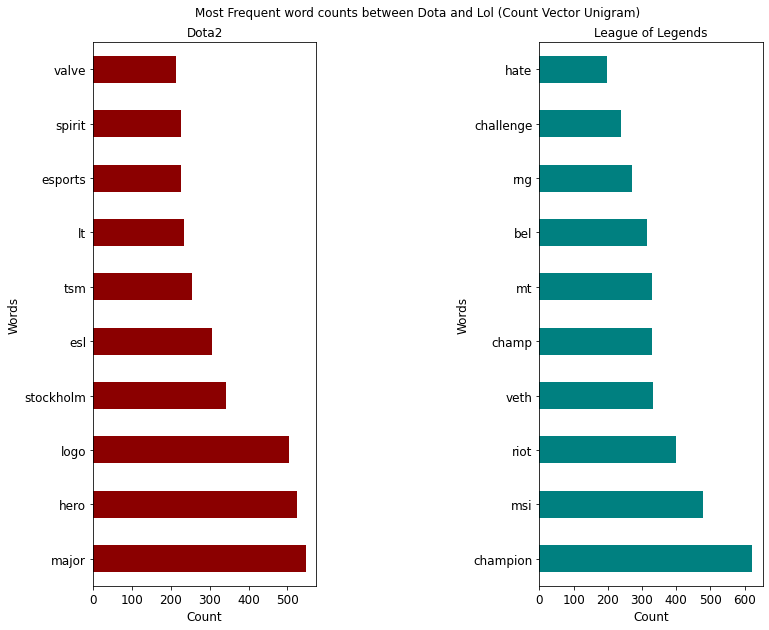

In [36]:
#Count vectorizing (Unigram)
ngram_vect = CountVectorizer()
dota_lem_sent_counts = pd.DataFrame(ngram_vect.fit_transform(dota_lol_data[dota_lol_data['subreddit']=='DotA2']['lem_sentence']).todense(),columns=ngram_vect.get_feature_names())
lol_lem_sent_counts = pd.DataFrame(ngram_vect.fit_transform(dota_lol_data[dota_lol_data['subreddit']=='leagueoflegends']['lem_sentence']).todense(),columns=ngram_vect.get_feature_names())

barh_plot(dota_lem_sent_counts.sum().sort_values(ascending=False).head(10),
          lol_lem_sent_counts.sum().sort_values(ascending=False).head(10),
         'Most Frequent word counts between Dota and Lol (Count Vector Unigram)')

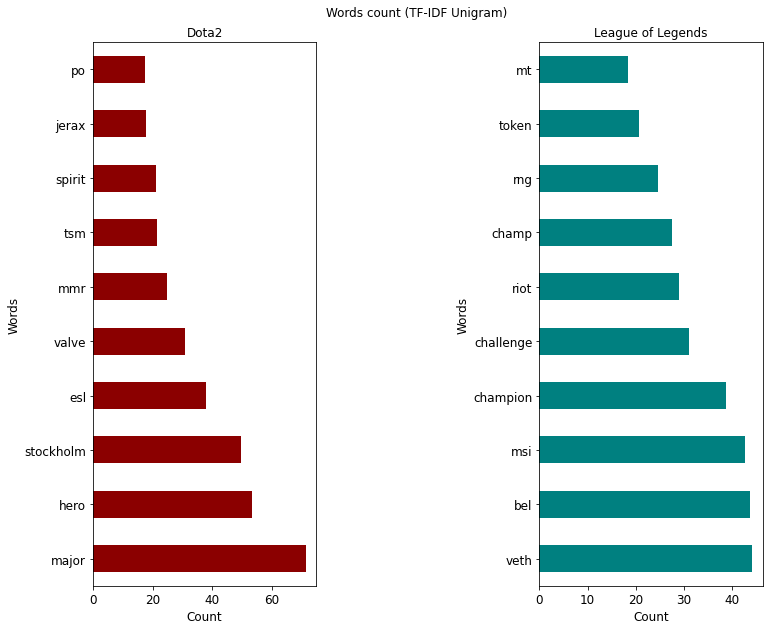

In [37]:
#TF-IDF Vectoring (Unigram)

tfidf_vect = TfidfVectorizer()
dota_tfidf= pd.DataFrame(tfidf_vect.fit_transform(dota_lol_data[dota_lol_data['subreddit']=='DotA2']['lem_sentence']).todense(), 
                                                columns=tfidf_vect.get_feature_names())
lol_tfidf= pd.DataFrame(tfidf_vect.fit_transform(dota_lol_data[dota_lol_data['subreddit']=='leagueoflegends']['lem_sentence']).todense(), 
                                                columns=tfidf_vect.get_feature_names())
barh_plot(dota_tfidf.sum().sort_values(ascending=False).head(10), lol_tfidf.sum().sort_values(ascending=False).head(10),
          'Words count (TF-IDF Unigram)')



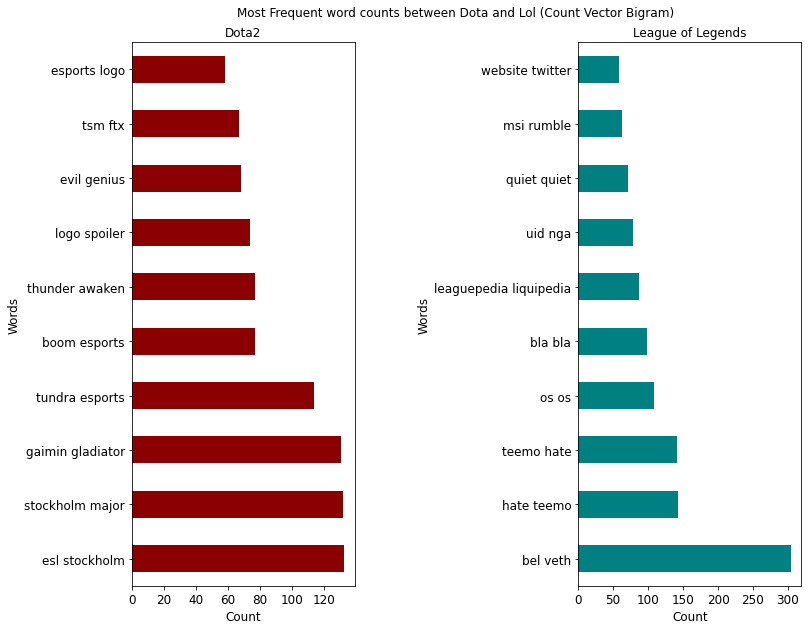

In [38]:
#Count vectorizing (Bigram)
ngram_vect = CountVectorizer(ngram_range=(2,2))
dota_lem_sent_counts = pd.DataFrame(ngram_vect.fit_transform(dota_lol_data[dota_lol_data['subreddit']=='DotA2']['lem_sentence']).todense(),columns=ngram_vect.get_feature_names())
lol_lem_sent_counts = pd.DataFrame(ngram_vect.fit_transform(dota_lol_data[dota_lol_data['subreddit']=='leagueoflegends']['lem_sentence']).todense(),columns=ngram_vect.get_feature_names())

barh_plot(dota_lem_sent_counts.sum().sort_values(ascending=False).head(10),
          lol_lem_sent_counts.sum().sort_values(ascending=False).head(10),
         'Most Frequent word counts between Dota and Lol (Count Vector Bigram)')

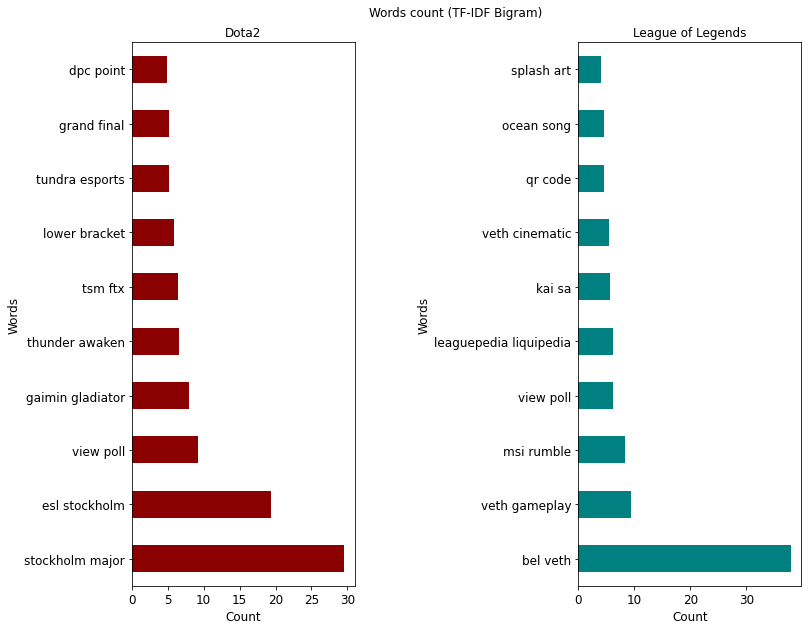

In [39]:
#TF-IDF Vectoring (Bigram)

tfidf_vect = TfidfVectorizer(ngram_range=(2,2))
dota_tfidf= pd.DataFrame(tfidf_vect.fit_transform(dota_lol_data[dota_lol_data['subreddit']=='DotA2']['lem_sentence']).todense(), 
                                                columns=tfidf_vect.get_feature_names())
lol_tfidf= pd.DataFrame(tfidf_vect.fit_transform(dota_lol_data[dota_lol_data['subreddit']=='leagueoflegends']['lem_sentence']).todense(), 
                                                columns=tfidf_vect.get_feature_names())
barh_plot(dota_tfidf.sum().sort_values(ascending=False).head(10), lol_tfidf.sum().sort_values(ascending=False).head(10),
          'Words count (TF-IDF Bigram)')



**Observations**

1. Count Vector top 10 word count appears more than 100 times while similar words under TF-IDF ranges below 70. 
    - This is because Count vector give more emphasis on higher repetitive words while TF-IDF focuses more on giving equal weights for words regardless of the amount of repetition count. Rational is because higher words count doesnt imply higher importance. While lesser used words may have significant impact in the differentiation for the repective classifications. 


2. For the word bel in lol, it was placed 9th position for count vector as it did not appear as much as other words like champion. However we can see that TF-IDF gave more weightage to bel as it quantifies higher importance compared to other words. 


3. When we applied bigram or even trigram, I realised the list would change again as the words appearing in pairs (bigram) differs. The total word count for the rest of the table drops significantly except for esl stockholm stockholm major(dota2) and bel veth(lol). This is because as TF-IDF focuses on equal weightage across the words instead of looking at repetitions. This is useful as having two or three words can give a better meaning of the underlying word. An example would be notebook vs notebook computer. (notebook can mean notebook for writing, computer notebook or juypter notebook).

## Modelling

In [40]:
X = dota_lol_data['lem_sentence']
y = dota_lol_data['subreddit'].map({'DotA2':0, 'leagueoflegends':1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

### Baseline Accuracy

In [41]:
#Determining the baseline accuracy for comparison with other model
y_test.value_counts(normalize=True)

0    0.582955
1    0.417045
Name: subreddit, dtype: float64

In [42]:
#Model Performance details and Confusion matrix Chart
def model_performance(model, X_train, y_train, X_test, y_test):
    prediction = model.predict(X_test)
    
    #Confusion Matrix Values
    tn,fp,fn,tp = confusion_matrix(y_test, prediction).ravel()
    
    
    print('Optimal Parameter: \n', model.best_params_)
    print('\nPerformance results')
    print('--------------------------------')
    print('Cross Validation Score(Best Score): ', model.best_score_)
    print('Score model (train): ',model.score(X_train, y_train))
    print('Score model (test): ',model.score(X_test, y_test))
    print('Sensitivity: ', tp/(tp+fn))
    print('Specificity: ', tn/(tn+fp))
          
    plt.figure(figsize=(10,12));
    plot_confusion_matrix(model, X_test, y_test, 
                          display_labels=['DotA2', 'leagueoflegends'], 
                          cmap='Blues',
                          values_format='d')
   
    
    

### Multinomial Naive Bayes (Count Vector)


In [43]:
cvec = CountVectorizer()

In [44]:
pipe_cvec_nb = Pipeline([('cvec', CountVectorizer()), 
                 ('nb', MultinomialNB())])

In [45]:
#Fitting my model
pipe_cvec_nb.fit(X_train, y_train)

#Training Score
pipe_cvec_nb.score(X_train, y_train)

#Test Score
pipe_cvec_nb.score(X_test, y_test)

0.8926136363636363

In [46]:
pipe_params = {'cvec__max_features':[2_000, 3_000, 4_000],
               'cvec__min_df':[2,3],
               'cvec__max_df': [0.8, .9, .95],
               'cvec__ngram_range': [(1,1), (1,2)],
               'nb__alpha' :np.arange(0.5,1.5,1)
               }
               

In [47]:
# Instantiate GridSearchCV
gs_cvec_nb = GridSearchCV(pipe_cvec_nb, 
                  param_grid = pipe_params,
                  cv=5)

In [48]:
gs_cvec_nb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.8, 0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'nb__alpha': array([0.5])})

Optimal Parameter: 
 {'cvec__max_df': 0.8, 'cvec__max_features': 4000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1), 'nb__alpha': 0.5}

Performance results
--------------------------------
Cross Validation Score(Best Score):  0.8894031668696712
Score model (train):  0.9334957369062119
Score model (test):  0.8926136363636363
Sensitivity:  0.8950953678474114
Specificity:  0.8908382066276803


<Figure size 720x864 with 0 Axes>

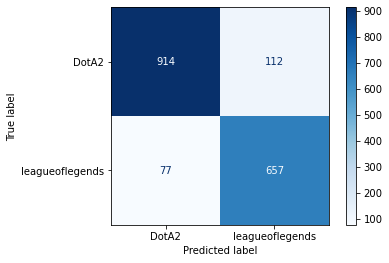

In [49]:
#Obtaining the test results
model_performance(gs_cvec_nb, X_train, y_train,X_test, y_test)

In [50]:
print(classification_report(y_test, gs_cvec_nb.predict(X_test) ))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1026
           1       0.85      0.90      0.87       734

    accuracy                           0.89      1760
   macro avg       0.89      0.89      0.89      1760
weighted avg       0.89      0.89      0.89      1760



### Feature importance


In [51]:
gs_cvec_nb.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.8, max_features=4000, min_df=3)),
                ('nb', MultinomialNB(alpha=0.5))])

In [52]:
transformer_cvec_nb = gs_cvec_nb.best_estimator_.named_steps['cvec']
estimator_cvec_nb = gs_cvec_nb.best_estimator_.named_steps['nb']

In [53]:
prob_diff_cvec_nb= pd.DataFrame()
prob_diff_cvec_nb['feature'] = transformer_cvec_nb.get_feature_names()
prob_diff_cvec_nb['log_prob_diff'] = estimator_cvec_nb.feature_log_prob_[1,:] - estimator_cvec_nb.feature_log_prob_[0,:]

prob_diff_cvec_nb.sort_values(by=['log_prob_diff'], ascending=False).head(10)

,feature,log_prob_diff
3782,veth,5.987891
341,bel,5.917533
2259,mt,5.912966
46,adc,5.358486
166,ap,5.203671
2957,rumble,5.184891
2908,riot,5.081810
95,ahri,5.064142
2713,quiet,4.889279
1936,leaguepedia,4.795878


**Observation for Multinomial Naive Bayes (Count Vector)**

#### GridSearchCV optimal parameters
1. Based on the GridSearchCV, the best parameter indicates that for max_df where its used to remove terms that appear too frequently, a 0.8 indicates ignoring terms that appear more than 80% of the document. 
2. max_features = 4000 indicates that it will build a vocabulary that consider the top 4000 features where they are sorted by the frequency across the documents.  
3. min_df = 3  indicates ignoring terms that appear in less than 3 documents as it removes terms that appear too infrequently.
4. n_gram =1,1 indicates that the model performs best with unigram features rather than bigram. 
5. nb_alpha is a smoothing parameter to improve your model scores. alpha = 0.5 indicates that there is a 50% smoothing while 0 indicates there is no smoothing required. 


#### Performance Results
1. For Multinomial (Count vector) model, the best score is 88.9%. This is the average score of all CV folds for a single combination of the parameters i specified in the pipe parameters. 
2. The accuracy score (precision) for train is 93.3% while for test is 89.2%. As the spread between the two scores are relatively small, this is an indication that there is no over/under fitting of data. Ontop of that, the accuracy score is above 85% threshold. Thus the result is acceptable for the model. 
3. Sensitivity of 89.5% indicates that out of all the correct values, the model predicted 89.5% of the words correctly. 
4. Specificity of 89% indicates that out of all the negatives, the model predicted 89% of the words correctly. 

The confusion matrix chart displays the visual of the predictions against the actual words. The top left corner indicates a total of 914 words that were predicted as Dota2 and was correct while the bottom right corners indicates a total of 657 words that were correctly predicted as leagueoflegend. The top right indicates that there are 112 words that were predicted as leagueoflegends but were acutally Dota2 while the bottom left indicates a total of 77 words that were predicted as leagueoflegend but were actually Dota2. 

#### Feature Importance
Feature importance focus on calculating a score that represents the impact of the specific feature on the model. We can clearly see that for Multinomial (Count vector), veth, bel, mt has a very strong importance in helping to determine their respective category. Since the values are positive, an increase of veth, bel or mt feature by one unit would increase the odd of the determination of the target feature by a factor of 5.98, 5.91 and 5.91 respectively. A point to note is that for count vector, the higher repetition of the word would result in more importance. 

## Multinomial Naive Bayes (TF-IDF)

In [54]:
tvec = TfidfVectorizer()

In [55]:
pipe_tvec_nb = Pipeline([('tvec', TfidfVectorizer()),
                      ('nb', MultinomialNB())])


In [56]:
#Fitting my model
pipe_tvec_nb.fit(X_train, y_train)

#Training Score
pipe_tvec_nb.score(X_train, y_train)

#Test Score
pipe_tvec_nb.score(X_test, y_test)

0.8926136363636363

In [57]:
pipe_tvec_params= {'tvec__max_features':[3_000,4_000],
                  'tvec__stop_words': [None, 'english'],
                  'tvec__ngram_range': [(1,1), (1,2)],
                  'nb__alpha' :np.arange(0.5,1.5,1)}

In [58]:
gs_tvec_nb= GridSearchCV(pipe_tvec_nb, 
                         param_grid = pipe_tvec_params,
                         cv =5)

In [59]:
gs_tvec_nb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': array([0.5]),
                         'tvec__max_features': [3000, 4000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [60]:
#Testing ( need to check if accuracy score code is correct)
prediction_tvec = gs_tvec_nb.predict(X_test)

print('accuracy score: ',accuracy_score(y_test, prediction_tvec))
gs_tvec_nb.score(X_test, y_test)

accuracy score:  0.8897727272727273


0.8897727272727273

Optimal Parameter: 
 {'nb__alpha': 0.5, 'tvec__max_features': 4000, 'tvec__ngram_range': (1, 1), 'tvec__stop_words': 'english'}

Performance results
--------------------------------
Cross Validation Score(Best Score):  0.8969549330085261
Score model (train):  0.9585870889159561
Score model (test):  0.8897727272727273
Sensitivity:  0.8446866485013624
Specificity:  0.9220272904483431


<Figure size 720x864 with 0 Axes>

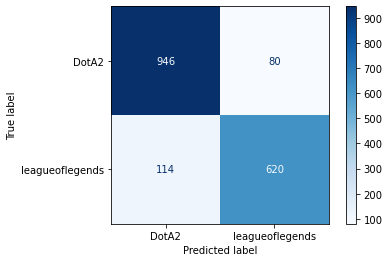

In [61]:
#Obtaining the test results
model_performance(gs_tvec_nb, X_train, y_train,X_test, y_test)

### Important Features


In [62]:
gs_tvec_nb.best_estimator_

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_features=4000, stop_words='english')),
                ('nb', MultinomialNB(alpha=0.5))])

In [63]:
transformer_tvec_nb = gs_tvec_nb.best_estimator_.named_steps['tvec']
estimator_tvec_nb = gs_tvec_nb.best_estimator_.named_steps['nb']

In [64]:
prob_diff_tvec_nb= pd.DataFrame()
prob_diff_tvec_nb['feature'] = transformer_tvec_nb.get_feature_names()
prob_diff_tvec_nb['log_prob_diff'] = estimator_tvec_nb.feature_log_prob_[1,:] - estimator_tvec_nb.feature_log_prob_[0,:]

prob_diff_tvec_nb.sort_values(by=['log_prob_diff'], ascending=False).head(10)

,feature,log_prob_diff
3774,veth,4.391923
330,bel,4.386619
2931,riot,3.950783
2246,msi,3.747366
2941,rng,3.551921
2980,rumble,3.356730
3736,urf,3.315485
45,adc,3.307007
2247,mt,3.295695
3089,sgb,3.221501


**Observation for Multinomial Naive Bayes (TF-IDF)**

#### GridSearchCV optimal parameters
1. nb_alpha is a smoothing parameter to improve your model scores. alpha = 0.5 indicates that there is a 50% smoothing while 0 indicates there is no smoothing required. This is similar to Multinomial (CVEC) model. 
2. max_features = 4000 indicates that it will build a vocabulary that consider the top 4000 features where they are sorted by the frequency across the documents.  
3. n_gram =1,1 indicates that the model performs best with unigram features rather than bigram. 
4. stop_words = 'english' indicates that the model feels that the optimal result would require the use of NLTK stop words. 
 


#### Performance Results
1. For Multinomial (TF-IDF) model, the best score is 89.6%. This is the average score of all CV folds for a single combination of the parameters i specified in the pipe parameters. 
2. The accuracy score (precision) for train is 95.8% while for test is 88.9%. As the spread between the two scores are relatively small, this is an indication that there is no over/under fitting of data. Ontop of that, the accuracy score is above 85% threshold. Thus the result is acceptable for the model. 
3. Sensitivity of 84.4% indicates that out of all the correct values, the model predicted 84.4% of the words correctly. The high result indicates that a relatively small percentage of values (15.6%) falls under False positive/ predicted as dota2 when infact it was league of legend. In comparison with multinomial (cvec), multinomial(tf-idf) faired slightly worst as it had more false positive. 
4. Specificity of 92.2% indicates that out of all the negatives, the model predicted 92.2% of the words correctly. There were more correct prediction for league of legends than dota2. 

The confusion matrix chart displays the visual of the predictions against the actual words. The top left corner indicates a total of 946 words that were predicted as Dota2 and was correct while the bottom right corners indicates a total of 620 words that were correctly predicted as leagueoflegend. The top right indicates that there are 80 words that were predicted as leagueoflegends but were acutally Dota2 while the bottom left indicates a total of 114 words that were predicted as leagueoflegend but were actually Dota2. 

#### Feature Importance
Feature importance focus on calculating a score that represents the impact of the specific feature on the model. We can clearly see that for Multinomial (TF-IDF), veth, bel and riot has a very strong importance in helping to determine their respective category. Since the values are positive, an increase of veth, bel or riot feature by one unit would increase the odd of the determination of the target feature by a factor of 4.39, 4.38 and 3.95 respectively.

 A point to note is that for count vector, the higher repetition of the word would result in more importance. Thus there is a difference in the features when we compare between count vector and td-idf feature importance. The score for TF-IDF is also lower as the features are given a relative equal weightage across all the words. 

### Logistic Regression (Count Vector)

In [65]:
pipe_cvec_lr = Pipeline([('cvec', CountVectorizer()),
                         ('lr', LogisticRegression())])

In [66]:
pipe_cvec_lr_params= { 'cvec__max_features':[4_000],
                       'cvec__min_df':[2,3],
                       'cvec__max_df': [0.8, .9, .95],
                       'cvec__ngram_range': [(1,1), (1,2)],
                       'lr__solver': ['liblinear','lbfgs'],
                       'lr__penalty': ['l1','l2']}
                       

In [67]:
gs_cvec_lr= GridSearchCV(pipe_cvec_lr, 
                         param_grid = pipe_cvec_lr_params,
                         cv= 5, 
                         n_jobs=-1)

In [68]:
gs_cvec_lr.fit(X_train, y_train)

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/z

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.8545676         nan 0.86942753 0.86942753 0.85481121        nan
 0.87088916 0.87040195 0.85505481        nan 0.87137637 0.87088916
 0.85529842        nan 0.87015834 0.87064555 0.8545676         nan
 0.86942753 0.86942753 0.8545676         nan 0.87088916 0.87040195
 0.85505481        nan 0.87137637 0.87088916 0.85529842        nan
 0.87015834 0.87064555 0.8545676         nan 0.86942753 0.86942753
 0.854324          nan 0.87088916 0.87040195 0.85554202        nan
 0.87137637 0.87088916 0.85505481        nan 0.87015834 0.87064555]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.8, 0.9, 0.95],
                         'cvec__max_features': [4000], 'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear', 'lbfgs']})

Optimal Parameter: 
 {'cvec__max_df': 0.8, 'cvec__max_features': 4000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1), 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}

Performance results
--------------------------------
Cross Validation Score(Best Score):  0.8713763702801461
Score model (train):  0.9722289890377588
Score model (test):  0.884090909090909
Sensitivity:  0.7752043596730245
Specificity:  0.9619883040935673


<Figure size 720x864 with 0 Axes>

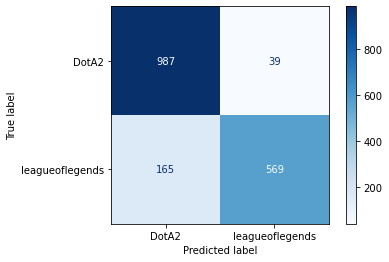

In [69]:
#Obtaining the test results
model_performance(gs_cvec_lr, X_train, y_train,X_test, y_test)

#### Model Performance


In [70]:
#Setting best estimator model
cvec_lr = gs_cvec_lr.best_estimator_

#Set respective variables
transformer_cvec_lr = cvec_lr.named_steps['cvec']
estimator_cvec_lr = cvec_lr.named_steps['lr']

#Building a coefficient dataframe
coef_cvec_lr = pd.DataFrame()
coef_cvec_lr['feature'] = transformer_cvec_lr.get_feature_names()
coef_cvec_lr['coefficient'] = estimator_cvec_lr.coef_.T
coef_cvec_lr['exp_coef'] = np.exp(coef_cvec_lr['coefficient'])

coef_cvec_lr.sort_values(by=['coefficient'], ascending =False).head(10)

,feature,coefficient,exp_coef
2908,riot,2.391738,10.932476
2258,msi,2.351575,10.502098
2918,rng,2.277121,9.748573
3746,urf,2.127606,8.394744
3782,veth,2.103072,8.191294
1830,kayn,1.996959,7.366618
536,challenge,1.985941,7.285900
539,champ,1.960269,7.101235
341,bel,1.954768,7.062278
540,champion,1.953505,7.053368


**Observation for Logistic Regression (Count Vector)**

#### GridSearchCV optimal parameters
1. Based on the GridSearchCV, the best parameter indicates that for max_df where its used to remove terms that appear too frequently, a 0.8 indicates ignoring terms that appear more than 80% of the document. 
2. max_features = 4000 indicates that it will build a vocabulary that consider the top 4000 features where they are sorted by the frequency across the documents.  
3. min_df = 3  indicates ignoring terms that appear in less than 3 documents as it removes terms that appear too infrequently.
4. n_gram =1,1 indicates that the model performs best with unigram features rather than bigram. 
5. Penalty = l2 & solver = liblinear indicates that the optimal model parameters would use l2/None penalty and liblinear solver for optimisation. A point to note is that during the execution, there was a warning indication as lbfgs solver only support l2 penalty (not l1) while liblinear can support both l1 and l2. 


#### Performance Results
1. For Logistic Regression (Count vector) model, the best score is 87%. This is the average score of all CV folds for a single combination of the parameters i specified in the pipe parameters. 
2. The accuracy score (precision) for train is 97.2% while for test is 88%. As the spread between the two scores are relatively small, this is an indication that there is no over/under fitting of data. Ontop of that, the accuracy score is above 85% threshold. Thus the result is acceptable for the model. 
3. Sensitivity of 77.5% indicates that out of all the correct values, the model predicted 77.5% of the words correctly. 
4. Specificity of 96% indicates that out of all the negatives, the model predicted 96% of the words correctly. 

The confusion matrix chart displays the visual of the predictions against the actual words. The top left corner indicates a total of 987 words that were predicted as Dota2 and was correct while the bottom right corners indicates a total of 569 words that were correctly predicted as leagueoflegend. The top right indicates that there are 165 words that were predicted as leagueoflegends but were acutally Dota2 while the bottom left indicates a total of 39 words that were predicted as leagueoflegend but were actually Dota2. 

#### Feature Importance
Each coef represents the log odds ratio when each covariate is increased by 1 unit. If a unit of feature of lol increase, the log odd of it being riot increases by 2.39. The exponentiate indicates that if a unit of feature increase, It is 10 times likely to be msi. 

### Logistic Regression (TFIDF)

In [71]:
pipe_tvec_nb = Pipeline([('tvec', TfidfVectorizer()),
                      ('lr', LogisticRegression())])


In [72]:
pipe_tvec_lr_params = { 'tvec__max_features':[3_000,4_000],
                       'tvec__min_df':[2,3],
                       'tvec__max_df': [0.8, .9, .95],
                       'tvec__ngram_range': [(1,1), (1,2)],
                       'lr__solver': ['liblinear','lbfgs'],
                       'lr__penalty': ['l1','l2']}

In [73]:
gs_tvec_lr = GridSearchCV(pipe_tvec_nb, 
                         param_grid = pipe_tvec_lr_params,
                         cv= 5, 
                         n_jobs=-1)

In [74]:
gs_tvec_lr.fit(X_train, y_train)

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solve

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solve

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or

/Users/zacharykwek/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.83337393 0.83386114 0.83361754 0.83386114 0.83313033 0.83264312
 0.83239951 0.83239951 0.83337393 0.83410475 0.83361754 0.83386114
 0.83313033 0.83264312 0.83239951 0.83239951 0.83337393 0.83386114
 0.83361754 0.83386114 0.83313033 0.83264312 0.83239951 0.83239951
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.86772229 0.87064555 0.86747868 0.87088916 0.8679659  0.86918392
 0.86723508 0.86772229 0.86772229 0.87064555 0.86747868 0.87088916
 0.8679659  0.86918392 0.86723508 0.86772229 0.86772229 0.87064555
 0.86747868 0.87088916 0.8679659  0.86918392 0.86723508 0.86772229
 0.86772229 0.87040195 0.86747868 0

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear', 'lbfgs'],
                         'tvec__max_df': [0.8, 0.9, 0.95],
                         'tvec__max_features': [3000, 4000],
                         'tvec__min_df': [2, 3],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

Optimal Parameter: 
 {'lr__penalty': 'l2', 'lr__solver': 'liblinear', 'tvec__max_df': 0.8, 'tvec__max_features': 3000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 2)}

Performance results
--------------------------------
Cross Validation Score(Best Score):  0.8708891595615104
Score model (train):  0.9454323995127892
Score model (test):  0.8857954545454545
Sensitivity:  0.7806539509536785
Specificity:  0.9610136452241715


<Figure size 720x864 with 0 Axes>

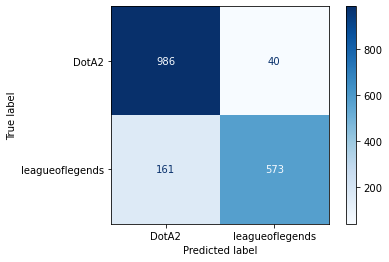

In [75]:
#Obtaining the test results
model_performance(gs_tvec_lr, X_train, y_train,X_test, y_test)

#### Model Performance (Logistic Regression (TD-IDF))

In [76]:
#Setting best estimator model
tvec_lr = gs_tvec_lr.best_estimator_

#Set respective variables
transformer_tvec_lr = tvec_lr.named_steps['tvec']
estimator_tvec_lr = tvec_lr.named_steps['lr']

#Building a coefficient dataframe
coef_tvec_lr = pd.DataFrame()
coef_tvec_lr['feature'] = transformer_tvec_lr.get_feature_names()
coef_tvec_lr['coefficient'] = estimator_tvec_lr.coef_.T
coef_tvec_lr['exp_coef'] = np.exp(coef_tvec_lr['coefficient'])

coef_tvec_lr.sort_values(by=['coefficient'], ascending =False).head(10)

,feature,coefficient,exp_coef
2193,riot,4.628324,102.342444
1697,msi,4.378938,79.753304
403,champion,4.270543,71.560467
401,champ,3.651288,38.524238
399,challenge,3.379704,29.362073
2201,rng,3.152436,23.392984
2831,veth,2.770083,15.959966
2807,urf,2.726096,15.273139
248,bel,2.701842,14.907167
128,aram,2.577510,13.164315


**Observation for Logistic Regression (TF-IDF)**

#### GridSearchCV optimal parameters
1. Based on the GridSearchCV, the best parameter indicates that for max_df where its used to remove terms that appear too frequently, a 0.8 indicates ignoring terms that appear more than 80% of the document. 
2. max_features = 3000 indicates that it will build a vocabulary that consider the top 3000 features where they are sorted by the frequency across the documents.  
3. min_df = 3  indicates ignoring terms that appear in less than 3 documents as it removes terms that appear too infrequently.
4. n_gram =1,2 indicates that the model performs best with the option of unigram or bigram mixture.
5. Penalty = l2 & solver = liblinear indicates that the optimal model parameters would use l2/None penalty and liblinear solver for optimisation. A point to note is that during the execution, there was a warning indication as lbfgs solver only support l2 penalty (not l1) while liblinear can support both l1 and l2. 


#### Performance Results
1. For Logistic Regression (TF-IDF) model, the best score is 87%. This is the average score of all CV folds for a single combination of the parameters i specified in the pipe parameters. 
2. The accuracy score (precision) for train is 94.5% while for test is 88.5%. As the spread between the two scores are relatively small, this is an indication that there is no over/under fitting of data. Ontop of that, the accuracy score is above 85% threshold. Thus the result is acceptable for the model. 
3. Sensitivity of 78% indicates that out of all the correct values, the model predicted 78% of the words correctly. 
4. Specificity of 96.1% indicates that out of all the negatives, the model predicted 96.1% of the words correctly. 

The confusion matrix chart displays the visual of the predictions against the actual words. The top left corner indicates a total of 986 words that were predicted as Dota2 and was correct while the bottom right corners indicates a total of 573 words that were correctly predicted as leagueoflegend. The top right indicates that there are 161 words that were predicted as leagueoflegends but were acutally Dota2 while the bottom left indicates a total of 40 words that were predicted as leagueoflegend but were actually Dota2. 

#### Feature Importance
Each coef represents the log odds ratio when each covariate is increased by 1 unit. If a unit of feature of lol increase, the log odd of it being riot increases by 4.62. The exponentiate indicates that if a unit of feature increase, It is 102 times likely to be msi. 


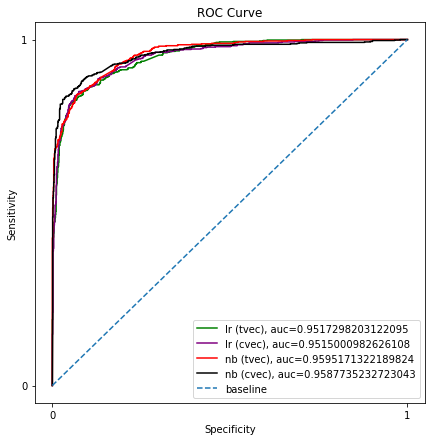

In [77]:
#Plotting Overlapping ROC curve across all 4 models
lr_tvec = gs_tvec_lr
lr_cvec = gs_cvec_lr
nb_tvec = gs_tvec_nb
nb_cvec = gs_cvec_nb

plt.figure(figsize=(7,7)).clf()
#Plotting Logistic regression (TF-IDF)
y_prediction_prob = lr_tvec.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prediction_prob)
auc =roc_auc_score(y_test, y_prediction_prob)
plt.plot(fpr,tpr, label='lr (tvec), auc='+str(auc), color ='green')

#Plotting Logistic regression (count vector) 
y_prediction_prob1 = lr_cvec.predict_proba(X_test)[:,1]
fpr1, tpr1, _ = roc_curve(y_test, y_prediction_prob1)
auc =roc_auc_score(y_test, y_prediction_prob1)
plt.plot(fpr1,tpr1, label='lr (cvec), auc='+str(auc), color='purple')

#Plotting Naive Bayes (TF-IDF) 
y_prediction_prob2 = nb_tvec.predict_proba(X_test)[:,1]
fpr2, tpr2, _ = roc_curve(y_test, y_prediction_prob2)
auc =roc_auc_score(y_test, y_prediction_prob2)
plt.plot(fpr2,tpr2, label='nb (tvec), auc='+str(auc), color='red')

#Plotting Naive Bayes (count vector) 
y_prediction_prob3 = nb_cvec.predict_proba(X_test)[:,1]
fpr3, tpr3, _ = roc_curve(y_test, y_prediction_prob3)
auc =roc_auc_score(y_test, y_prediction_prob3)
plt.plot(fpr3,tpr3, label='nb (cvec), auc='+str(auc), color = 'black')

plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.plot(['0','1'], ['0','1'], label='baseline', linestyle='--' )
plt.legend(loc=4)
plt.show()

#### Intepreting ROC AUC 
As all 4 models ROC AUC is close to 1, this indicates that our positive and negative population are perfectly seperated. In another words, this indicates that our predictor can clearly segregate the difference. Generally, all 4 types of models performed fairly well as they are relately close to 1. However as we look closer, we can see that models with TF-IDF in both logistic regression and multinomial NB performed consistently well across both model and above count vector. This indicates that for this two subreddit, highly repetitive words may not be as informative as words that appear less frequent. The misclassification could also be due to words that appear on both subreddit did not provide any categorical significants which could have been included in the stopword. As we look at the ROC chart, we can see that at a certain point of sensitivity, it starts to curve and stay stagnant with each increase in specificity. For example, we can see nb(cvec) curve was increasing relatively strongly until the point where nb(tvec) cross over it as we increase specificity.

## Conclusion and Recommendation

|Model|Best Score|Accuracy(train)|Accuracy(test)|Sensitivity|Specificity
|---|---|---|---|---|---|
|**Multinomial NB (Count Vector)**|0.889|0.933|**0.892**|0.895|0.890
|Multinomial NB (TF-IDF)|0.896|0.958|0.889|0.844|0.922
|Logistic Regression (Count Vector)|0.871|0.972|0.884|0.775|0.961
|Logistic Regression (TF-IDF)|0.870|0.945|0.885|0.780|0.961


In conclusion, 
- Multinomial NB (Count Vector) model has the best accuracy among all the other models in terms of predicting which category the features belongs to. 

- The result would help segregate comments obtained from the main beta forum and channel to sub forum that enables players to have a more cohesive discussion among similar area of interest. With more players coming together to share methods and learn from each other in terms of strategy as well as forming online teams, this would ultimately lead to user growth in Twitch as well as the respective games. 

- As Twitch is deriving its revenue from successful game streaming as well as user growth, Twitch could venture future into determining sentimental analysis as well as detecting negative comments on a particular game(beyond Dota2 and LOL) in ensuring the continuous success of such games. 

- Twitch can also utilise the ability of our categorical models to determine the rising trends of different games type and could have the power to guide content creator as well as the community to venture and stream live videos of such games as a form of entertainments. 


### Limitations and next step

The limitations to our model is that our models are only able to learn and differentiate from useful features as well as large amount of data. If users decided to increase non-game related chatters or input images/gif to tell their story, our model would not be able to succesfully categorised the features/trend. 

Players can also use alternate forums to hold their discussions which could lead to a low daily active users which can ultimately lead to low collection of data. This would limit our models as we may not have enough strong features to train our models to make accruate and reliable predictions.

**Possible improvements**
- We can look to collect data directly from our twitch streaming live chatbox instead of relying on reddit forums. By doing so, we could obtain live updates on the games, strategies, trends and even events that are occuring/occuring soon. This timely update would also help twitch to make adequate preparation in view of a sudden surge in daily active users. 


